In [1]:
pwd

'/home/wsuser/work'

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_4a1182c31960476ea7c08d4eb93c569b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Oc97FGB9kVQZpK2SOyDgRHXcEbahwz0oz_qDnBC3Cq5O',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_4a1182c31960476ea7c08d4eb93c569b.get_object(Bucket='animalclassification-donotdelete-pr-tpgk5l6nhtziwq', Key='Animal_Dataset.zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
ls -1

dataset/


In [4]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [5]:
ls -1

dataset/


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [8]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [9]:
pwd

'/home/wsuser/work'

In [10]:
ls

dataset/


In [11]:
cd /home/wsuser/work/dataset

/home/wsuser/work/dataset


In [12]:
ls

animalcnn.tgz  animal.h5  animal.tgz  dataset/  Testing/  Training/


In [13]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Training",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1238 images belonging to 4 classes.


In [14]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/dataset/Testing",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 326 images belonging to 4 classes.


In [15]:
len(x_test)

14

In [16]:
326/24

13.583333333333334

In [17]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}

# CNN

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [19]:
model=Sequential()

In [20]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [21]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))

/tmp/wsuser/ipykernel_8801/234118701.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))


Epoch 1/10
52/52 [==============================] - 14s 258ms/step - loss: 0.8698 - accuracy: 0.6446 - val_loss: 0.9520 - val_accuracy: 0.5798
Epoch 3/10
52/52 [==============================] - 14s 258ms/step - loss: 0.7246 - accuracy: 0.7108 - val_loss: 0.6676 - val_accuracy: 0.7546
Epoch 4/10
52/52 [==============================] - 14s 264ms/step - loss: 0.6415 - accuracy: 0.7520 - val_loss: 0.5707 - val_accuracy: 0.7761
Epoch 5/10
52/52 [==============================] - 13s 258ms/step - loss: 0.5113 - accuracy: 0.8078 - val_loss: 0.4913 - val_accuracy: 0.8190
Epoch 6/10
52/52 [==============================] - 14s 263ms/step - loss: 0.4337 - accuracy: 0.8344 - val_loss: 0.3991 - val_accuracy: 0.8436
Epoch 7/10
52/52 [==============================] - 14s 260ms/step - loss: 0.4477 - accuracy: 0.8312 - val_loss: 0.3948 - val_accuracy: 0.8650
Epoch 8/10
52/52 [==============================] - 14s 261ms/step - loss: 0.3752 - accuracy: 0.8586 - val_loss: 0.2689 - val_accuracy: 0.8896

In [26]:
model.save('animal.h5')

# Test Model

In [27]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [28]:
model=load_model('animal.h5')

In [29]:
img=image.load_img(r"/home/wsuser/work/dataset/Testing/elephants/images (43).jpeg",target_size=(64,64))

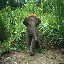

In [30]:
img

In [31]:
x=image.img_to_array(img)

In [32]:
x

array([[[ 40.,  60.,  51.],
        [ 35.,  55.,  46.],
        [ 16.,  36.,  27.],
        ...,
        [ 70., 112.,  48.],
        [ 60., 101.,  45.],
        [ 68., 105.,  61.]],

       [[  9.,  29.,  20.],
        [ 21.,  41.,  32.],
        [ 67.,  87.,  78.],
        ...,
        [ 66., 108.,  44.],
        [ 58.,  99.,  43.],
        [ 81., 117.,  79.]],

       [[ 16.,  36.,  25.],
        [ 34.,  54.,  43.],
        [ 29.,  49.,  38.],
        ...,
        [ 44.,  86.,  22.],
        [ 51.,  91.,  39.],
        [119., 157., 106.]],

       ...,

       [[103.,  99.,  88.],
        [102.,  99.,  84.],
        [115., 112.,  95.],
        ...,
        [113., 110.,  93.],
        [123., 121., 106.],
        [129., 124., 105.]],

       [[ 54.,  49.,  45.],
        [ 53.,  48.,  42.],
        [ 83.,  79.,  70.],
        ...,
        [129., 123., 109.],
        [107., 103.,  91.],
        [109., 104.,  85.]],

       [[ 61.,  69.,  56.],
        [ 76.,  81.,  75.],
        [ 92.,  

In [33]:
x.ndim

3

In [34]:
x=np.expand_dims(x,axis=0)

In [35]:
x

array([[[[ 40.,  60.,  51.],
         [ 35.,  55.,  46.],
         [ 16.,  36.,  27.],
         ...,
         [ 70., 112.,  48.],
         [ 60., 101.,  45.],
         [ 68., 105.,  61.]],

        [[  9.,  29.,  20.],
         [ 21.,  41.,  32.],
         [ 67.,  87.,  78.],
         ...,
         [ 66., 108.,  44.],
         [ 58.,  99.,  43.],
         [ 81., 117.,  79.]],

        [[ 16.,  36.,  25.],
         [ 34.,  54.,  43.],
         [ 29.,  49.,  38.],
         ...,
         [ 44.,  86.,  22.],
         [ 51.,  91.,  39.],
         [119., 157., 106.]],

        ...,

        [[103.,  99.,  88.],
         [102.,  99.,  84.],
         [115., 112.,  95.],
         ...,
         [113., 110.,  93.],
         [123., 121., 106.],
         [129., 124., 105.]],

        [[ 54.,  49.,  45.],
         [ 53.,  48.,  42.],
         [ 83.,  79.,  70.],
         ...,
         [129., 123., 109.],
         [107., 103.,  91.],
         [109., 104.,  85.]],

        [[ 61.,  69.,  56.],
       

In [36]:
x.ndim

4

In [37]:
pred=np.argmax(model.predict(x),axis=1)

In [38]:
pred

array([2])

In [39]:
index=['bears', 'crows', 'elephants', 'rats']

In [40]:
index[pred[0]]

'elephants'

In [41]:
img=image.load_img(r"/home/wsuser/work/dataset/Testing/bears/k4 (73).jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['bears', 'crows', 'elephants', 'rats']
print(index[pred[0]])

bears


In [42]:
img=image.load_img(r"/home/wsuser/work/dataset/Testing/rats/images (47).jpeg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['bears', 'crows', 'elephants', 'rats']
print(index[pred[0]])

rats


In [46]:
img=image.load_img(r"/home/wsuser/work/dataset/Testing/crows/Z1 (31).jpeg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x),axis=1)
index=['bears', 'crows', 'elephants', 'rats']
print(index[pred[0]])

FileNotFoundError: [Errno 2] No such file or directory: '/home/wsuser/work/dataset/Testing/crows/Z1 (31).jpeg'

In [47]:
#IBM Deployment

In [48]:
!pip install watson-machine-learning-client

In [49]:
from ibm_watson_machine_learning import APIClient

In [50]:
wml_credentials = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"s0263ZI446waXaEO4cFK5IgXSJTTKssj4OskJkNLhj0r"
}

In [51]:
client = APIClient(wml_credentials)

In [52]:
client

In [53]:
def uid_space_name(client,animal_deploy):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == animal_deploy)['metadata']['id'])

In [54]:
space_uid = uid_space_name(client, 'animal_deploy')
print(space_uid)

eb097b69-2120-4290-ac6a-ba3009b4f8e5


In [55]:
client.set.default_space(space_uid)

'SUCCESS'

In [56]:
client.software_specifications.list(200)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [ ]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [ ]:
software_space_uid

In [ ]:
ls

In [ ]:
!tar -zcvf animal.tgz animal.h5

In [ ]:
ls

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
model_details = client.repository.store_model(model = 'animal.tgz', meta_props = {
    client.repository.ModelMetaNames.NAME:"CNN Model",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [ ]:
model_id = client.repository.get_model_id(model_details)

In [ ]:
model_id

In [ ]:
ls

In [ ]:
client.repository.download('e3c4b8de-930a-4a4b-827e-4c6da5ff8865','animalcnn.tgz')

In [57]:
ls

animalcnn.tgz  animal.h5  animal.tgz  dataset/  Testing/  Training/
